In [ ]:
! wget https://raw.githubusercontent.com/argonne-lcf/ai-science-training-series/main/01_intro_AI_on_Supercomputer/mpi_pi.py
! pip install mpi4py

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import IPython.display as ipydis
import time

In [ ]:
! [ -e ./slimmed_realestate_data.csv ] || wget https://raw.githubusercontent.com/argonne-lcf/ai-science-training-series/main/01_intro_AI_on_Supercomputer/slimmed_realestate_data.csv
data = pd.read_csv('slimmed_realestate_data.csv')
print(data.columns)

--2024-03-17 01:30:25--  https://raw.githubusercontent.com/argonne-lcf/ai-science-training-series/main/01_intro_AI_on_Supercomputer/slimmed_realestate_data.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.108.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 8804 (8.6K) [text/plain]
Saving to: ‘slimmed_realestate_data.csv’

slimmed_realestate_ 100%[===================>]   8.60K  --.-KB/s    in 0s      

2024-03-17 01:30:25 (56.5 MB/s) - ‘slimmed_realestate_data.csv’ saved [8804/8804]

Index(['Unnamed: 0', 'SalePrice', 'GrLivArea'], dtype='object')


<Axes: xlabel='GrLivArea'>

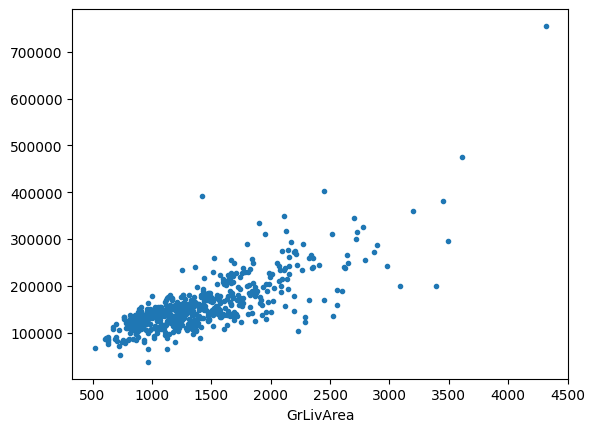

In [ ]:
data.plot(x='GrLivArea', y='SalePrice', style='.', legend=False)

In [ ]:
n=len(data)
data_batch = data.sample(64)
data_x = data_batch['GrLivArea'].to_numpy()
data_y = data_batch['SalePrice'].to_numpy()
sum_data_xdata_y = np.sum(data_x*data_y)#Regression
sum_data_x = np.sum(data_x)
sum_data_y = np.sum(data_y)
sum_data_x2 = np.sum(data_x*data_x)
denominator = n * sum_data_x2 - sum_data_x * sum_data_x
m = (n * sum_data_xdata_y - sum_data_x * sum_data_y) / denominator
b = (sum_data_y * sum_data_x2 - sum_data_x * sum_data_xdata_y) / denominator
print('y = %f * x + %f' % (m,b))

# saving these for later comparison
m_calc = m
b_calc = b
# Lets fit the data
def plot_data(data_x,data_y,m,b,plt=plt):
  #plot our data points with 'bo' = blue circles
  plt.plot(data_x,data_y,'bo')
  #create the line based on our linear fit
  # first we need to make x points
  # the 'arange' function generates points between two limits(min,max)
  linear_x=np.arange(data_x.min(),data_x.max())
  #no we use our fit paramters to calculate the y poins based on our x poistition
  linear_y=linear_x*m+b
  #plot the linear points uisng 'r-' = red lines
  plt.plot(linear_x,linear_y,'r-',label='fit')
  plt.xlabel("square footage")
  plt.ylabel("sale price")

y = 107.018019 * x + 699.464892


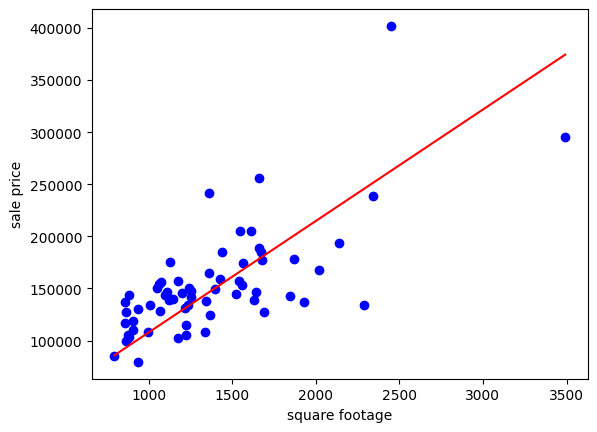

In [ ]:
plot_data(data_x,data_y,m,b)

y_i = 5.00 * x + 1000.00
first 10 loss values:  [6.64958702e+09 2.80897600e+10 2.42627352e+10 1.32802576e+10
 7.21140640e+09 1.81037025e+10 1.09217030e+11 4.10852630e+10
 5.09082250e+09 7.96170872e+10]
y_i = 5.55 * x + 1000.00     previously calculated: y_i = 117.12 * x + -314.03


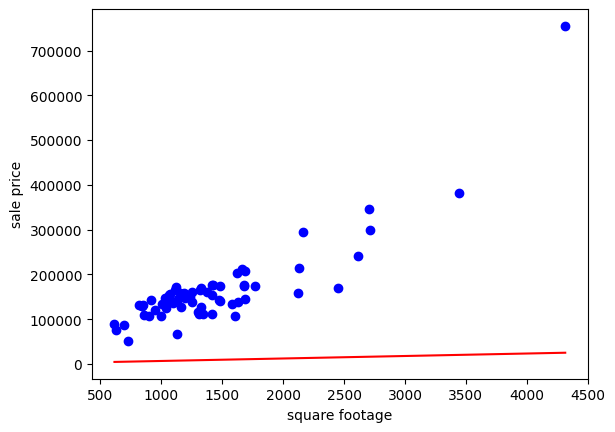

In [ ]:
# Training through stochastic gradeient Descent (SGD)
# this is a common moethod in Ai for training deep neural networks on large datasets. It is an iterative method for optimizing a loss function that we get to define. We will use this simple linear regression to demonstrate how it works.
#The Model
# In AI neural networks are often referred to as a model because, once fully trained, they should model(AKLA predict) the behavior of our system. In our example, the system is how house prices vary based on house size. We know our system is roughly driven by a linear function y_i(x_i)=m*x_i+b, we just need to figure out m and b
#lest calculate m and b
def model(x,m,b):
  return m*x+b
# The loss function: is a objective function, is somehting we define and is based on what we want to achieve. in the method of SGD, it is our goal to minimize (or make close to zero) the values calculated from the loss function. IN our example we ideally want the prediction of our model to be euqal to the acutal data, thought we will settle for "as close as possible".
def loss(data_x,data_y,m,b):
  data_y_predicted=model(data_x,m,b)
  return np.power(data_y-data_y_predicted,2)
#minimizing loss
def updated_m(data_x,data_y,m,b,learning_rate):
   dL_dm = - 2 * data_x * (data_y - model(data_x,m,b))
   dL_dm = np.mean(dL_dm)
   return m - learning_rate * dL_dm

def updated_b(data_x,data_y,m,b,learning_rate):
   dL_db = - 2 * (data_y - model(data_x,m,b))
   dL_db = np.mean(dL_db)
   return b - learning_rate * dL_db
#Now we can randomly select our initial slope and intercept:
m = 5.
b = 1000.
print('y_i = %.2f * x + %.2f' % (m,b))
l = loss(data_x,data_y,m,b)
print('first 10 loss values: ',l[:10])
learning_rate = 1e-9
m = updated_m(data_x,data_y,m,b,learning_rate)
b = updated_b(data_x,data_y,m,b,learning_rate)
print('y_i = %.2f * x + %.2f     previously calculated: y_i = %.2f * x + %.2f' % (m,b,m_calc,b_calc))
plot_data(data_x,data_y,m,b)

[000]  dy_i = 51.83 * x + 17847.96     previously calculated: y_i = 111.64 * x + 893.50    loss: 6372583119.385522
[001]  dy_i = 72.78 * x + 25427.82     previously calculated: y_i = 111.64 * x + 893.50    loss: 2458112551.771347
[002]  dy_i = 82.13 * x + 28856.88     previously calculated: y_i = 111.64 * x + 893.50    loss: 1674388131.911329
[003]  dy_i = 86.30 * x + 30426.60     previously calculated: y_i = 111.64 * x + 893.50    loss: 1517733355.387483
[004]  dy_i = 88.15 * x + 31163.05     previously calculated: y_i = 111.64 * x + 893.50    loss: 1486517101.927356
[005]  dy_i = 88.95 * x + 31525.71     previously calculated: y_i = 111.64 * x + 893.50    loss: 1480323913.049650
[006]  dy_i = 89.29 * x + 31720.34     previously calculated: y_i = 111.64 * x + 893.50    loss: 1479092447.724036
[007]  dy_i = 89.42 * x + 31839.09     previously calculated: y_i = 111.64 * x + 893.50    loss: 1478832173.381090
[008]  dy_i = 89.46 * x + 31923.23     previously calculated: y_i = 111.64 * x +

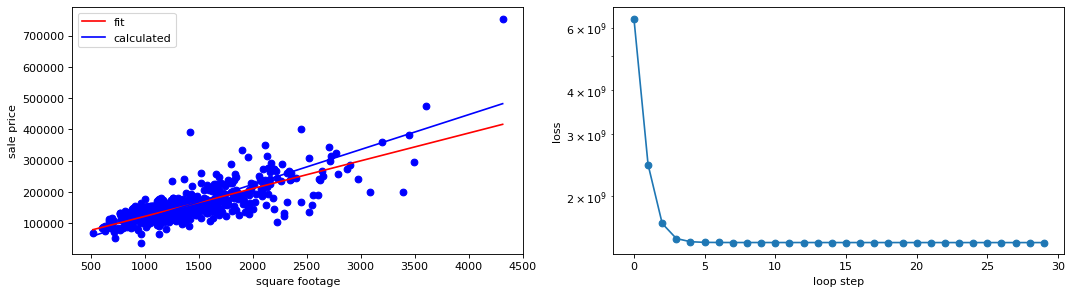

In [ ]:
# set our initial slope and intercept
m = 5.
b = 1000.
# batch_size = 60
# set a learning rate for each parameter
learning_rate_m = 1e-7
learning_rate_b = 1e-1
# use these to plot our progress over time
loss_history = []
# convert panda data to numpy arrays, one for the "Ground Living Area" and one for "Sale Price"
data_x = data['GrLivArea'].to_numpy()
data_y = data['SalePrice'].to_numpy()
# we run our loop N times
loop_N = 30
for i in range(loop_N):
   # update our slope and intercept based on the current values
   m = updated_m(data_x,data_y,m,b,learning_rate_m)
   b = updated_b(data_x,data_y,m,b,learning_rate_b)

   # calculate the loss value
   loss_value = np.mean(loss(data_x,data_y,m,b))

   # keep a history of our loss values
   loss_history.append(loss_value)

   # print our progress
   print('[%03d]  dy_i = %.2f * x + %.2f     previously calculated: y_i = %.2f * x + %.2f    loss: %f' % (i,m,b,m_calc,b_calc,loss_value))

   # close/delete previous plots
   plt.close('all')

# create a 1 by 2 plot grid
plt.figure(figsize=(16, 4), dpi=80)

# First subplot: Scatter plot and the calculated linear fit
plt.subplot(1, 2, 1)
plot_data(data_x, data_y, m, b)
line_x = np.arange(data_x.min(), data_x.max())
line_y = line_x * m_calc + b_calc
plt.plot(line_x, line_y, 'b-', label='calculated')
plt.legend()
plt.xlabel('square footage')
plt.ylabel('sale price')

# Second subplot: Loss over loop steps
plt.subplot(1, 2, 2)
loss_x = np.arange(0, len(loss_history))
loss_y = np.asarray(loss_history)
plt.plot(loss_x, loss_y, 'o-')
plt.yscale('log')
plt.xlabel('loop step')
plt.ylabel('loss')

# gives us time to see the plot
plt.show()
time.sleep(2.5)

# clears the plot when the next plot is ready to show.
plt.close('all')
ipydis.clear_output(wait=True)


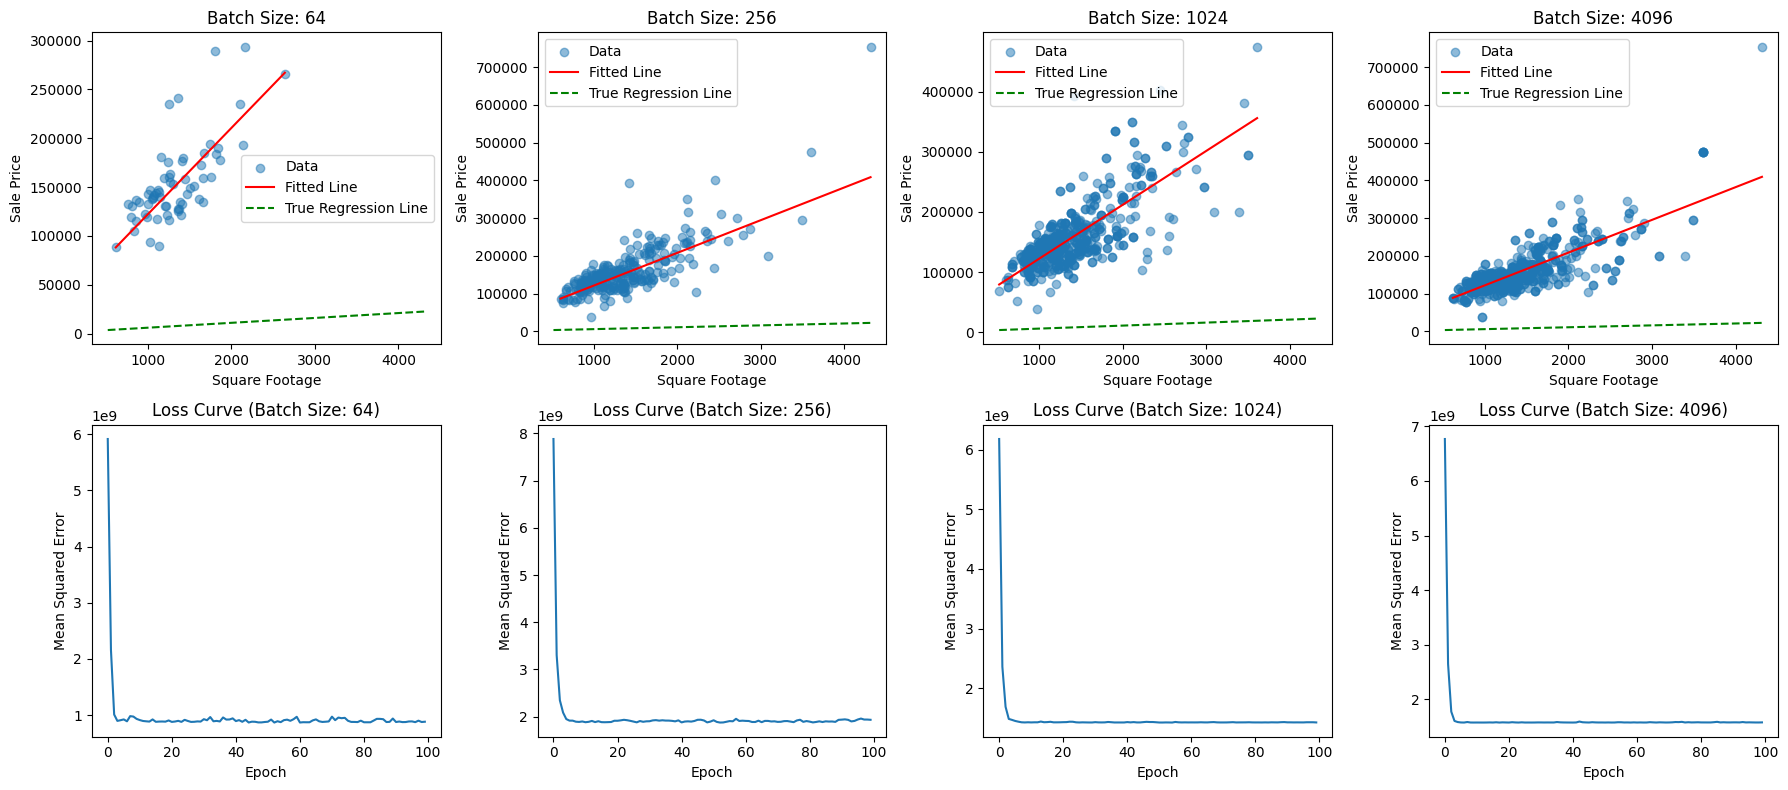

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Load the real estate data
data = pd.read_csv('slimmed_realestate_data.csv')

def updated_m(data_x, data_y, m, b, learning_rate):
    dL_dm = -2 * data_x * (data_y - (m * data_x + b))
    dL_dm = np.mean(dL_dm)
    return m - learning_rate * dL_dm

def updated_b(data_x, data_y, m, b, learning_rate):
    dL_db = -2 * (data_y - (m * data_x + b))
    dL_db = np.mean(dL_db)
    return b - learning_rate * dL_db

def loss(data_x, data_y, m, b):
    data_y_predicted = m * data_x + b
    return np.mean((data_y - data_y_predicted) ** 2)

def train_linear_regression(data_x, data_y, batch_size, learning_rate_m, learning_rate_b, num_epochs):
    m = 5.0  # Initial slope
    b = 1000.0  # Initial intercept
    loss_history = []

    for _ in range(num_epochs):
        # Randomly sample a batch
        if batch_size <= len(data):
            data_batch = data.sample(batch_size)
        else:
            data_batch = data.sample(len(data), replace=True)
        data_x_batch = data_batch['GrLivArea'].to_numpy()
        data_y_batch = data_batch['SalePrice'].to_numpy()

        # Update parameters using the current batch
        m = updated_m(data_x_batch, data_y_batch, m, b, learning_rate_m)
        b = updated_b(data_x_batch, data_y_batch, m, b, learning_rate_b)

        # Calculate and store the loss
        current_loss = loss(data_x, data_y, m, b)
        loss_history.append(current_loss)

    return m, b, loss_history

batch_sizes = [64, 256, 1024, 4096]
learning_rate_m = 1e-7
learning_rate_b = 1e-1
num_epochs = 100

# Generate true regression line
x_true = np.linspace(data['GrLivArea'].min(), data['GrLivArea'].max(), 100)
y_true = 5 * x_true + 1000

fig, axes = plt.subplots(2, 4, figsize=(18, 8))

for i, batch_size in enumerate(batch_sizes):
    ax_data = axes[0, i]  # Indexing for data plot
    ax_loss = axes[1, i]  # Indexing for loss plot

    # Randomly sample data
    if batch_size <= len(data):
        data_batch = data.sample(batch_size)
    else:
        data_batch = data.sample(len(data), replace=True)
    data_x_batch = data_batch['GrLivArea'].to_numpy()
    data_y_batch = data_batch['SalePrice'].to_numpy()

    # Train linear regression
    m, b, loss_history = train_linear_regression(data_x_batch, data_y_batch, batch_size, learning_rate_m, learning_rate_b, num_epochs)

    # Calculate fitted line
    x_fit = np.linspace(data_x_batch.min(), data_x_batch.max(), 100)
    y_fit = m * x_fit + b

    # Plot scatter plot and fitted line
    ax_data.scatter(data_x_batch, data_y_batch, alpha=0.5, label='Data')
    ax_data.plot(x_fit, y_fit, color='red', label='Fitted Line')
    ax_data.plot(x_true, y_true, color='green', linestyle='--', label='True Regression Line')
    ax_data.set_title(f'Batch Size: {batch_size}')
    ax_data.set_xlabel('Square Footage')
    ax_data.set_ylabel('Sale Price')
    ax_data.legend()

    # Plot loss curve
    ax_loss.plot(range(num_epochs), loss_history)
    ax_loss.set_title(f'Loss Curve (Batch Size: {batch_size})')
    ax_loss.set_xlabel('Epoch')
    ax_loss.set_ylabel('Mean Squared Error')

plt.tight_layout()
plt.show()



/usr/local/lib/python3.10/dist-packages/numpy/core/_methods.py:118: RuntimeWarning: overflow encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims, where=where)
<ipython-input-68-cd1ebb9aea34>:20: RuntimeWarning: overflow encountered in square
  return np.mean((data_y - data_y_predicted) ** 2)


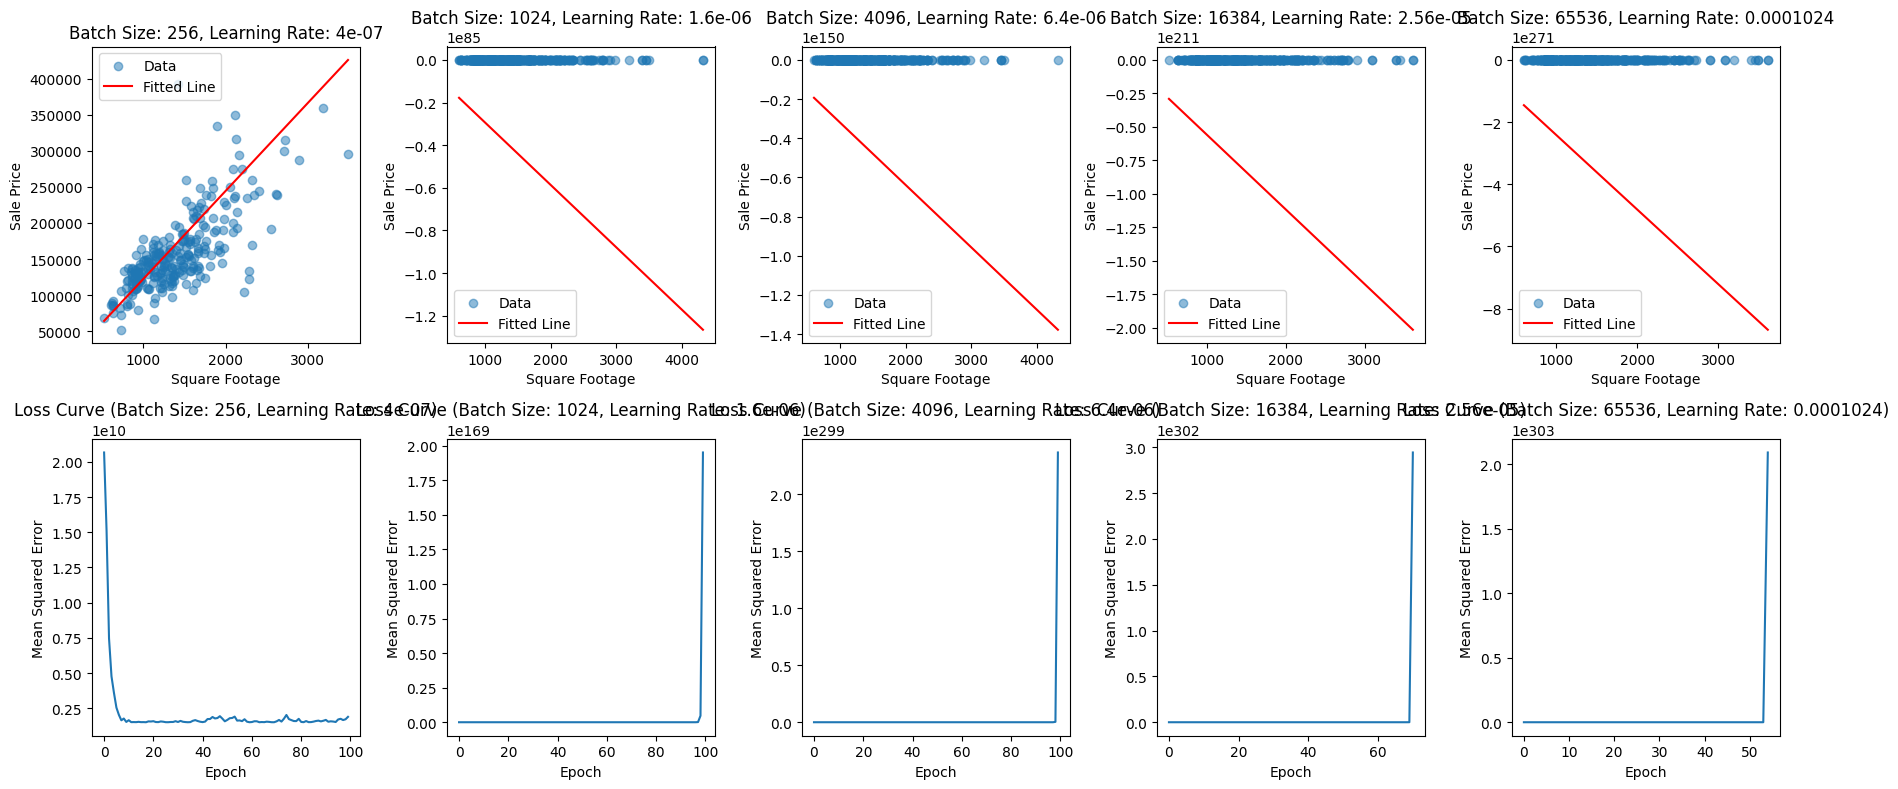

In [ ]:
 import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Load the real estate data
data = pd.read_csv('slimmed_realestate_data.csv')

def updated_m(data_x, data_y, m, b, learning_rate):
    dL_dm = -2 * data_x * (data_y - (m * data_x + b))
    dL_dm = np.mean(dL_dm)
    return m - learning_rate * dL_dm

def updated_b(data_x, data_y, m, b, learning_rate):
    dL_db = -2 * (data_y - (m * data_x + b))
    dL_db = np.mean(dL_db)
    return b - learning_rate * dL_db

def loss(data_x, data_y, m, b):
    data_y_predicted = m * data_x + b
    return np.mean((data_y - data_y_predicted) ** 2)

def train_linear_regression(data_x, data_y, batch_size, learning_rate_m, learning_rate_b, num_epochs):
    m = 5.0  # Initial slope
    b = 1000.0  # Initial intercept
    loss_history = []

    for _ in range(num_epochs):
        # Randomly sample a batch
        if batch_size <= len(data):
            data_batch = data.sample(batch_size)
        else:
            data_batch = data.sample(len(data), replace=True)
        data_x_batch = data_batch['GrLivArea'].to_numpy()
        data_y_batch = data_batch['SalePrice'].to_numpy()

        # Update parameters using the current batch
        m = updated_m(data_x_batch, data_y_batch, m, b, learning_rate_m)
        b = updated_b(data_x_batch, data_y_batch, m, b, learning_rate_b)

        # Calculate and store the loss
        current_loss = loss(data_x, data_y, m, b)
        loss_history.append(current_loss)

    return m, b, loss_history

batch_sizes = [64 * 4**i for i in range(1, 6)]
learning_rates = [1e-7 * 4**i for i in range(1, 6)]
num_epochs = 100

fig, axes = plt.subplots(2, len(batch_sizes), figsize=(18, 8))

for i, (batch_size, learning_rate) in enumerate(zip(batch_sizes, learning_rates)):
    ax_data = axes[0, i]  # Indexing for data plot
    ax_loss = axes[1, i]  # Indexing for loss plot

    # Randomly sample data
    if batch_size <= len(data):
        data_batch = data.sample(batch_size)
    else:
        data_batch = data.sample(len(data), replace=True)
    data_x_batch = data_batch['GrLivArea'].to_numpy()
    data_y_batch = data_batch['SalePrice'].to_numpy()

    # Train linear regression
    m, b, loss_history = train_linear_regression(data_x_batch, data_y_batch, batch_size, learning_rate, learning_rate, num_epochs)

    # Calculate fitted line
    x_fit = np.linspace(data_x_batch.min(), data_x_batch.max(), 100)
    y_fit = m * x_fit + b

    # Plot scatter plot and fitted line
    ax_data.scatter(data_x_batch, data_y_batch, alpha=0.5, label='Data')
    ax_data.plot(x_fit, y_fit, color='red', label='Fitted Line')
    ax_data.set_title(f'Batch Size: {batch_size}, Learning Rate: {learning_rate}')
    ax_data.set_xlabel('Square Footage')
    ax_data.set_ylabel('Sale Price')
    ax_data.legend()

    # Plot loss curve
    ax_loss.plot(range(num_epochs), loss_history)
    ax_loss.set_title(f'Loss Curve (Batch Size: {batch_size}, Learning Rate: {learning_rate})')
    ax_loss.set_xlabel('Epoch')
    ax_loss.set_ylabel('Mean Squared Error')

plt.tight_layout()
plt.show()
